# 导入库

In [12]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
os.chdir(r'D:\my_dateset')
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np
from math import sqrt
#评价指标
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [4]:
#定义均方根误差RMSE
def root_mean_squared_error(y_true, y_predict):
    return sqrt(mean_squared_error(y_true, y_predict))

# 导入数据集

In [5]:
feature_train=pd.read_excel('D:\\my_dateset\\data_20.xlsx',index_col='SMILES')
label_train=pd.read_excel('D:\my_dateset\ERα_activity.xlsx',index_col='SMILES',sheet_name='training')
del label_train["IC50_nM"]
data=pd.concat((feature_train,label_train),axis=1)
X=feature_train
y=label_train
X

,maxHsOH,minsssN,MLFER_A,MDEC-23,maxssO,BCUTc-1l,maxdssC,BCUTp-1h,ATSc3,XLogP,maxsOH,C1SP2,VPC-6,ATSm5,MDEC-12,MDEC-22,maxHBint10,SHBint8,maxaaCH,minHBd
SMILES,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0.469126,2.516142,0.546,28.277932,6.593009,-0.360525,0.000000,13.254859,-0.126453,4.666,9.968948,0,5.510599,58.060335,0.000000,26.172039,0.000000,0.0,2.222816,0.469126
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0.449126,2.521244,0.546,31.076748,6.674642,-0.360530,0.000000,13.617609,-0.126453,5.804,10.058948,0,5.746301,60.060335,0.000000,31.359828,0.000000,0.0,2.238441,0.449126
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0.516534,2.484448,1.089,30.901064,6.502751,-0.361379,0.000000,13.393453,-0.143126,2.964,9.977508,0,4.507677,60.392427,0.000000,25.916013,5.153720,0.0,2.117122,0.480713
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.456486,2.519774,0.546,30.570001,6.622142,-0.360530,0.000000,13.079547,-0.126504,6.015,10.025028,0,5.150641,57.728243,0.000000,30.776455,0.000000,0.0,2.228687,0.456486
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0.473631,2.504217,0.546,30.570001,6.552810,-0.360530,0.000000,13.043454,-0.128690,4.462,9.993342,0,4.401611,57.728243,0.000000,30.776455,0.000000,0.0,2.208996,0.473631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,0.511809,0.000000,1.089,45.421854,6.299676,-0.363905,0.888007,12.775315,0.060040,2.526,9.862971,0,5.303789,89.083040,3.671961,23.651446,7.087084,0.0,1.872973,0.502282
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,0.536069,0.000000,2.175,45.421854,6.260832,-0.364009,0.868389,12.774086,0.051389,1.884,9.829120,0,5.113223,85.083040,0.000000,23.651446,7.101401,0.0,1.789148,0.507282
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,0.545019,0.000000,2.175,44.466435,6.247428,-0.364009,0.874012,12.729192,0.051394,1.884,9.815320,0,5.083699,83.750948,0.000000,23.343682,7.081222,0.0,1.784294,0.509751


# 数据标准化

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# SVR

In [13]:

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform


start =time.process_time() #计算时间
#分割数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=49)
#定义模型
svm_clf = SVR(kernel='rbf')
#定义参数范围
param_distributions = {"gamma": reciprocal(0.001, 0.01), "C": uniform(1, 10)}
#随机搜索调参
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=100,verbose=2,cv=5,scoring='r2', random_state=42,n_jobs=1)
rnd_search_cv.fit(X_train, y_train)
end = time.process_time()
print('Running time: %s Seconds'%(end-start))
# 搜寻到的最佳模型
rnd_search_cv.best_estimator_
# 进行模型性能估计
y_pred1 = rnd_search_cv.best_estimator_.predict(X_train)
y_pred2 = rnd_search_cv.best_estimator_.predict(X_val)
print("训练 RMSE:",root_mean_squared_error(y_train, y_pred1))
print("训练 MAE:",mean_absolute_error(y_train, y_pred1))
print("得分:",np.sqrt(rnd_search_cv.score(X_val,y_val)))
print("测试 RMSE:",root_mean_squared_error(y_val, y_pred2))
print("测试 MAE:",mean_absolute_error(y_val, y_pred2))
print('拟合度：',r2_score(y_val,y_pred2))


In [ ]:
#拟合效果图
aa_true=pd.DataFrame(y_val[:30]).values
aa_val=y_pred2[:30]
plt.figure(figsize=(10,5),dpi=300)
plt.plot(aa_true, "b.-",label="ture")
plt.plot(aa_val, "r.-",label="val")
plt.xlabel("30 个数据编号")
plt.ylabel("pIC50")
plt.legend(['val_true','val_pre'])
plt.title("SVR模型 30 个验证数据真实值和预测值", fontsize=14)

In [ ]:
'''
Running time: 48.25 Seconds
训练 RMSE: 0.7668075341004157
训练 MAE: 0.5596333067137556
得分: 0.8063671881545547
测试 RMSE: 0.8577925265921361
测试 MAE: 0.6504180328456628
拟合度： 0.6502280421322829
'''

## SVR参数调优图

In [14]:
from sklearn.model_selection import cross_val_score

score_lst = []
best_score = 0

for gamma in [0.002, 0.004,0.006,0.008,0.01]:
    for C in  [2,4,6,8,10]:
        svm_clf= SVR(kernel='rbf',C=C,gamma=gamma)
        score = cross_val_score(svm_clf,X_train,y_train,cv=5,scoring='r2')
        score_lst.append(score.mean())
        if score.mean() > best_score:
            best_score = score.mean()
            best_parameters = {'gamma':gamma,"C":C}
            print(gamma,C,score.mean())
        else:
            pass
            
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))
print(score_lst)


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.002 2 0.5522645289660743


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.002 4 0.5598623762920825


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.002 6 0.563855061978538


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.002 8 0.5683318064951128


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.002 10 0.5728222577779201


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.004 4 0.5858960158793677


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.004 6 0.5953457511795109


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.004 8 0.6023538391203771


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.004 10 0.6084047099406054


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.006 6 0.6191639875214818


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.006 8 0.6269580518847641


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.006 10 0.6317610989854167


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.008 6 0.6351068898262552


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.008 8 0.6406552998339701


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.008 10 0.6442801966357816


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.01 6 0.6453055177819935


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01 8 0.6499499334416861


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

0.01 10 0.6552092738650572
Best socre:0.66
Best parameters:{'gamma': 0.01, 'C': 10}
[0.5522645289660743, 0.5598623762920825, 0.563855061978538, 0.5683318064951128, 0.5728222577779201, 0.5724754969108201, 0.5858960158793677, 0.5953457511795109, 0.6023538391203771, 0.6084047099406054, 0.5904167528499766, 0.6073857327985394, 0.6191639875214818, 0.6269580518847641, 0.6317610989854167, 0.6055499788228353, 0.6258247977801074, 0.6351068898262552, 0.6406552998339701, 0.6442801966357816, 0.6195862062493095, 0.6377675045800111, 0.6453055177819935, 0.6499499334416861, 0.6552092738650572]


C:\Users\赵龙\AppData\Local\Temp\ipykernel_20196\2925087504.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


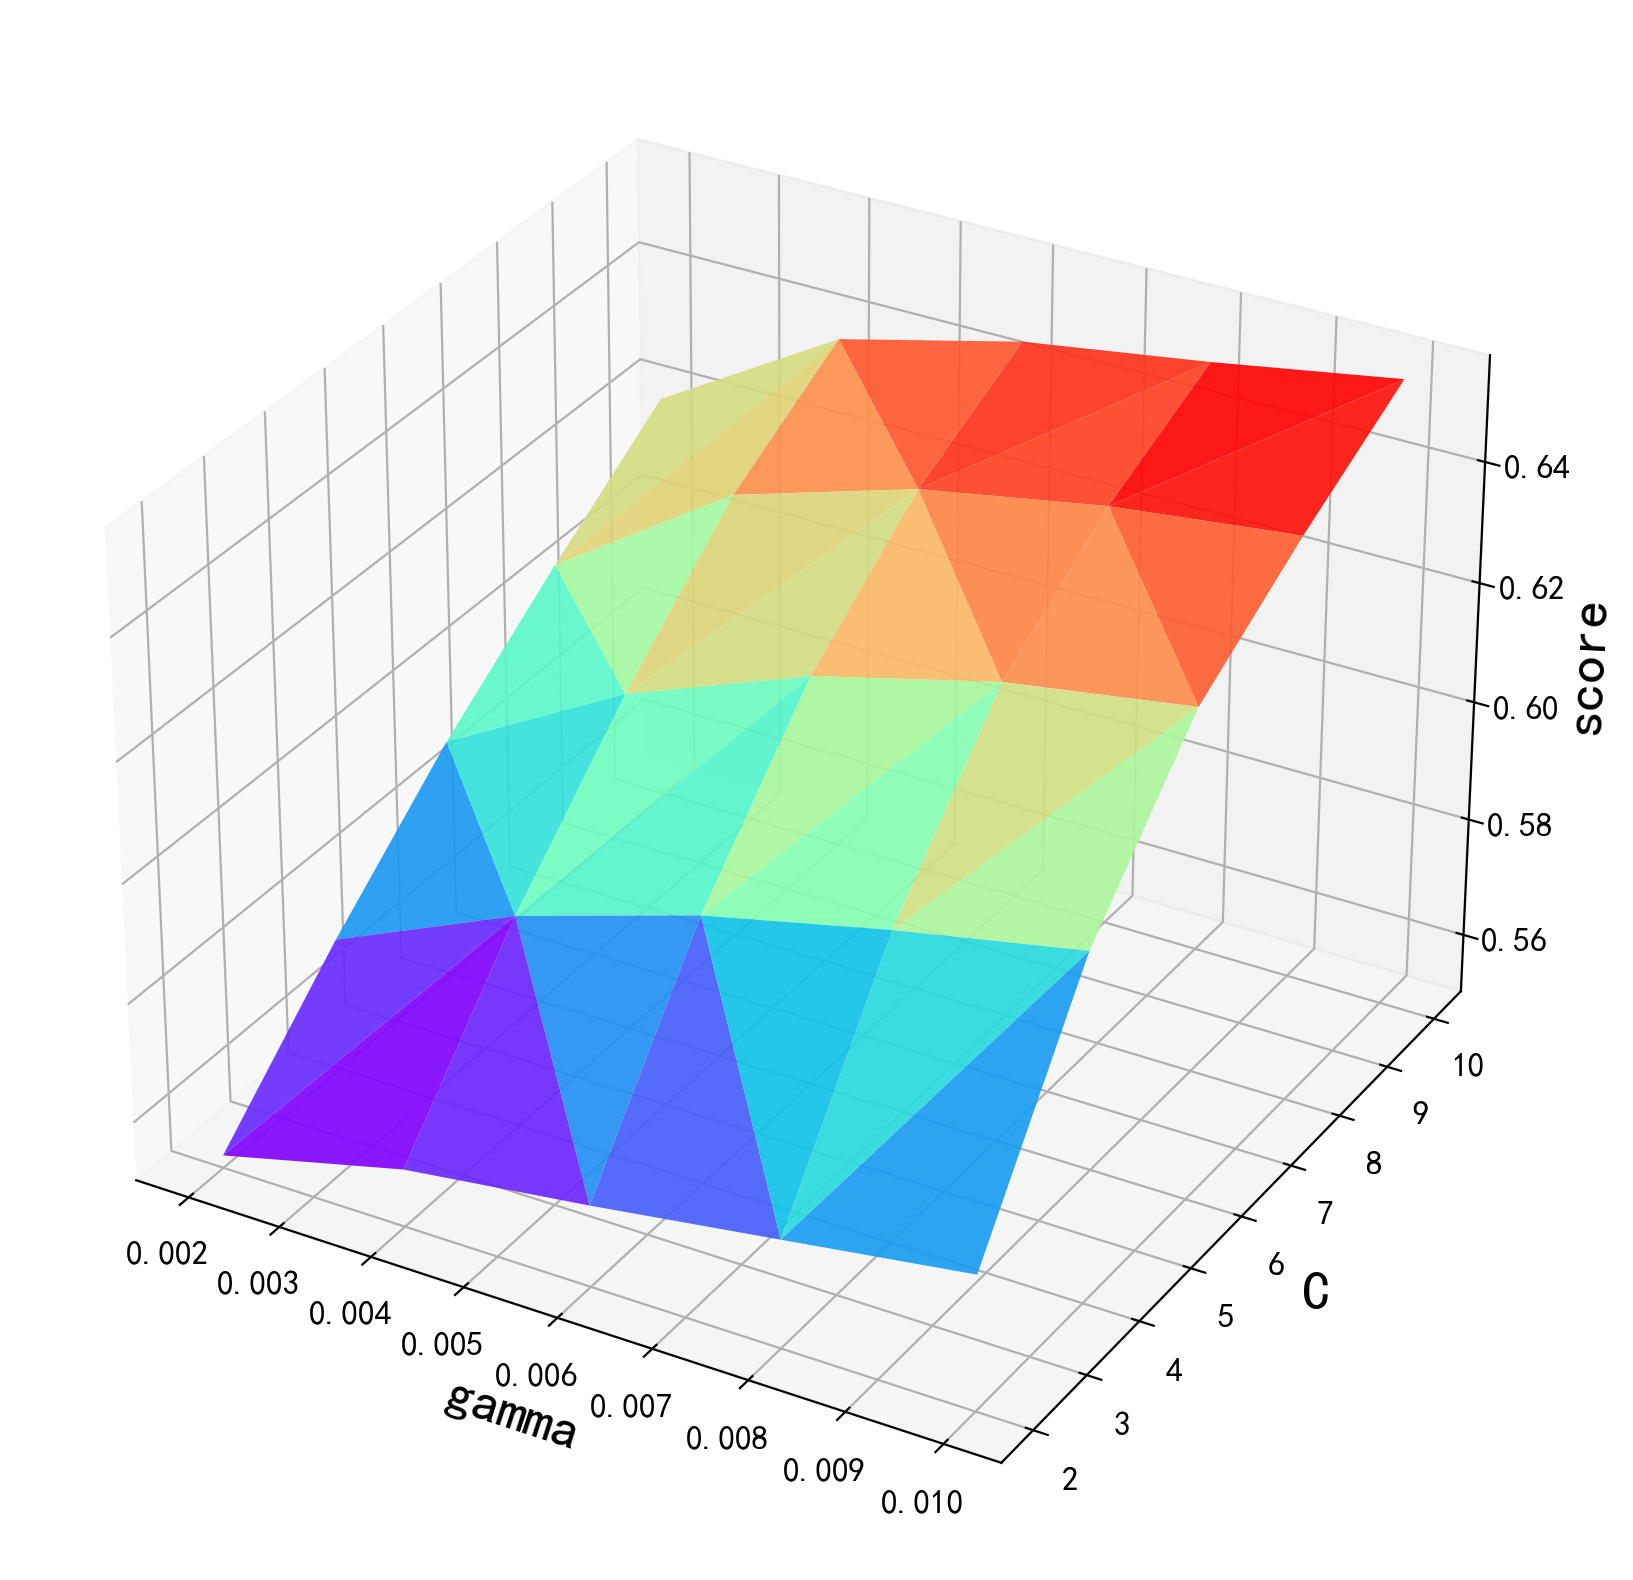

In [17]:

from tkinter.ttk import Style
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  #三维图绘制包
import pandas as pd  
import seaborn as sns     


gamma = np.array([0.002, 0.004,0.006,0.008,0.01])
C = np.array([2,4,6,8,10])
xx1, yy1 = np.meshgrid(gamma,C)

newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = yy1.reshape(newshape)
x_input = xx1.reshape(newshape)
z_input = np.array(score_lst).reshape(newshape)

fig = plt.figure(figsize=(10,8),dpi=200)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x_input,y_input,z_input,cmap='rainbow',color='white',alpha=0.9)  


ax.set_ylabel('C',fontsize  = 20) 
ax.set_xlabel('gamma',fontsize  = 20) 
ax.set_zlabel('score',fontsize  = 20) 
fig.tight_layout()
plt.show()

In [57]:
print(rnd_search_cv.best_params_)

{'C': 10.394989415641891, 'gamma': 0.007849235338159358}


# RF

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
start =time.process_time() #计算时间
#划分数据集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=49)
#定义超参数范围
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
                }
#建立模型
forest_reg = RandomForestRegressor(random_state=42)
#随机搜索
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,n_iter=100, cv=5,scoring='r2', random_state=42)
rnd_search.fit(X_train, y_train)
end = time.process_time()
print('Running time: %s Seconds'%(end-start))
# 搜寻到的最佳模型
print(rnd_search.best_estimator_)
# 进行模型性能估计
y_pred1 = rnd_search.best_estimator_.predict(X_train)
y_pred2 = rnd_search.best_estimator_.predict(X_val)
print("训练 RMSE:",root_mean_squared_error(y_train, y_pred1))
print("训练 MAE:",mean_absolute_error(y_train, y_pred1))
print("得分:",np.sqrt(rnd_search.score(X_val,y_val)))
print("测试 RMSE:",root_mean_squared_error(y_val, y_pred2))
print("测试 MAE:",mean_absolute_error(y_val, y_pred2))
print('拟合度：',r2_score(y_val,y_pred2))


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Running time: 117.5 Seconds
RandomForestRegressor(max_features=4, n_estimators=199, random_state=42)
训练 RMSE: 0.27714525102608606
训练 MAE: 0.20022907042965138
得分: 0.860387871301914
测试 RMSE: 0.7391849030833508
测试 MAE: 0.5525725620888806
拟合度： 0.7402672890834389


In [ ]:
#拟合图
aa_true=pd.DataFrame(y_val[:30]).values
aa_val=y_pred2[:30]
plt.figure(figsize=(10,5),dpi=300)
plt.plot(aa_true, "b.-",label="ture")
plt.plot(aa_val, "r.-",label="val")
plt.xlabel("30 个数据编号")
plt.ylabel("pIC50")
plt.legend(['val_true','val_pre'])
plt.title("RF模型 30 个验证数据真实值和预测值", fontsize=14)

In [ ]:
'''
Running time: 119.90625 Seconds
RandomForestRegressor(max_features=4, n_estimators=199, random_state=42)
训练 RMSE: 0.27714525102608606
训练 MAE: 0.20022907042965138
得分: 0.860387871301914
测试 RMSE: 0.7391849030833508
测试 MAE: 0.5525725620888806
拟合度： 0.7402672890834389
'''

In [106]:
print(rnd_search.best_params_)

{'max_features': 4, 'n_estimators': 199}


## RF调参图

In [18]:
from sklearn.model_selection import cross_val_score

score_lst = []
best_score = 0

for max_features in [2,4,6,8,10]:
    for n_estimators in  [50,100,150,200,250]:
        RF_clf= RandomForestRegressor(max_features=max_features,n_estimators=n_estimators,random_state=42)
        score = cross_val_score(RF_clf,X_train,y_train,cv=5,scoring='r2')
        score_lst.append(score.mean())
        if score.mean() > best_score:
            best_score = score.mean()
            best_parameters = {'max_features':max_features,"n_estimators":n_estimators}
            print(max_features,n_estimators,score.mean())
        else:
            pass
            
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))
print(score_lst)


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 50 0.7262748448189494


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 100 0.729902154580982


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 200 0.7304053198433749


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

2 250 0.7311739362613614


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

4 150 0.7317292919731389


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

4 200 0.7330196665821582


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Best socre:0.73
Best parameters:{'max_features': 4, 'n_estimators': 200}
[0.7262748448189494, 0.729902154580982, 0.7288615655924313, 0.7304053198433749, 0.7311739362613614, 0.7220375391400374, 0.7293266313590705, 0.7317292919731389, 0.7330196665821582, 0.7325725204278981, 0.7220414616179115, 0.7274323400664036, 0.7295852799154275, 0.7305125050220644, 0.7312824629030291, 0.7272506174449346, 0.7324634180874912, 0.7316634361852973, 0.7321524225522624, 0.7323821200165986, 0.71944506545743, 0.7261538073681036, 0.726724073427687, 0.727673189211252, 0.7290719900263032]


C:\Users\赵龙\AppData\Local\Temp\ipykernel_20196\3985703006.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


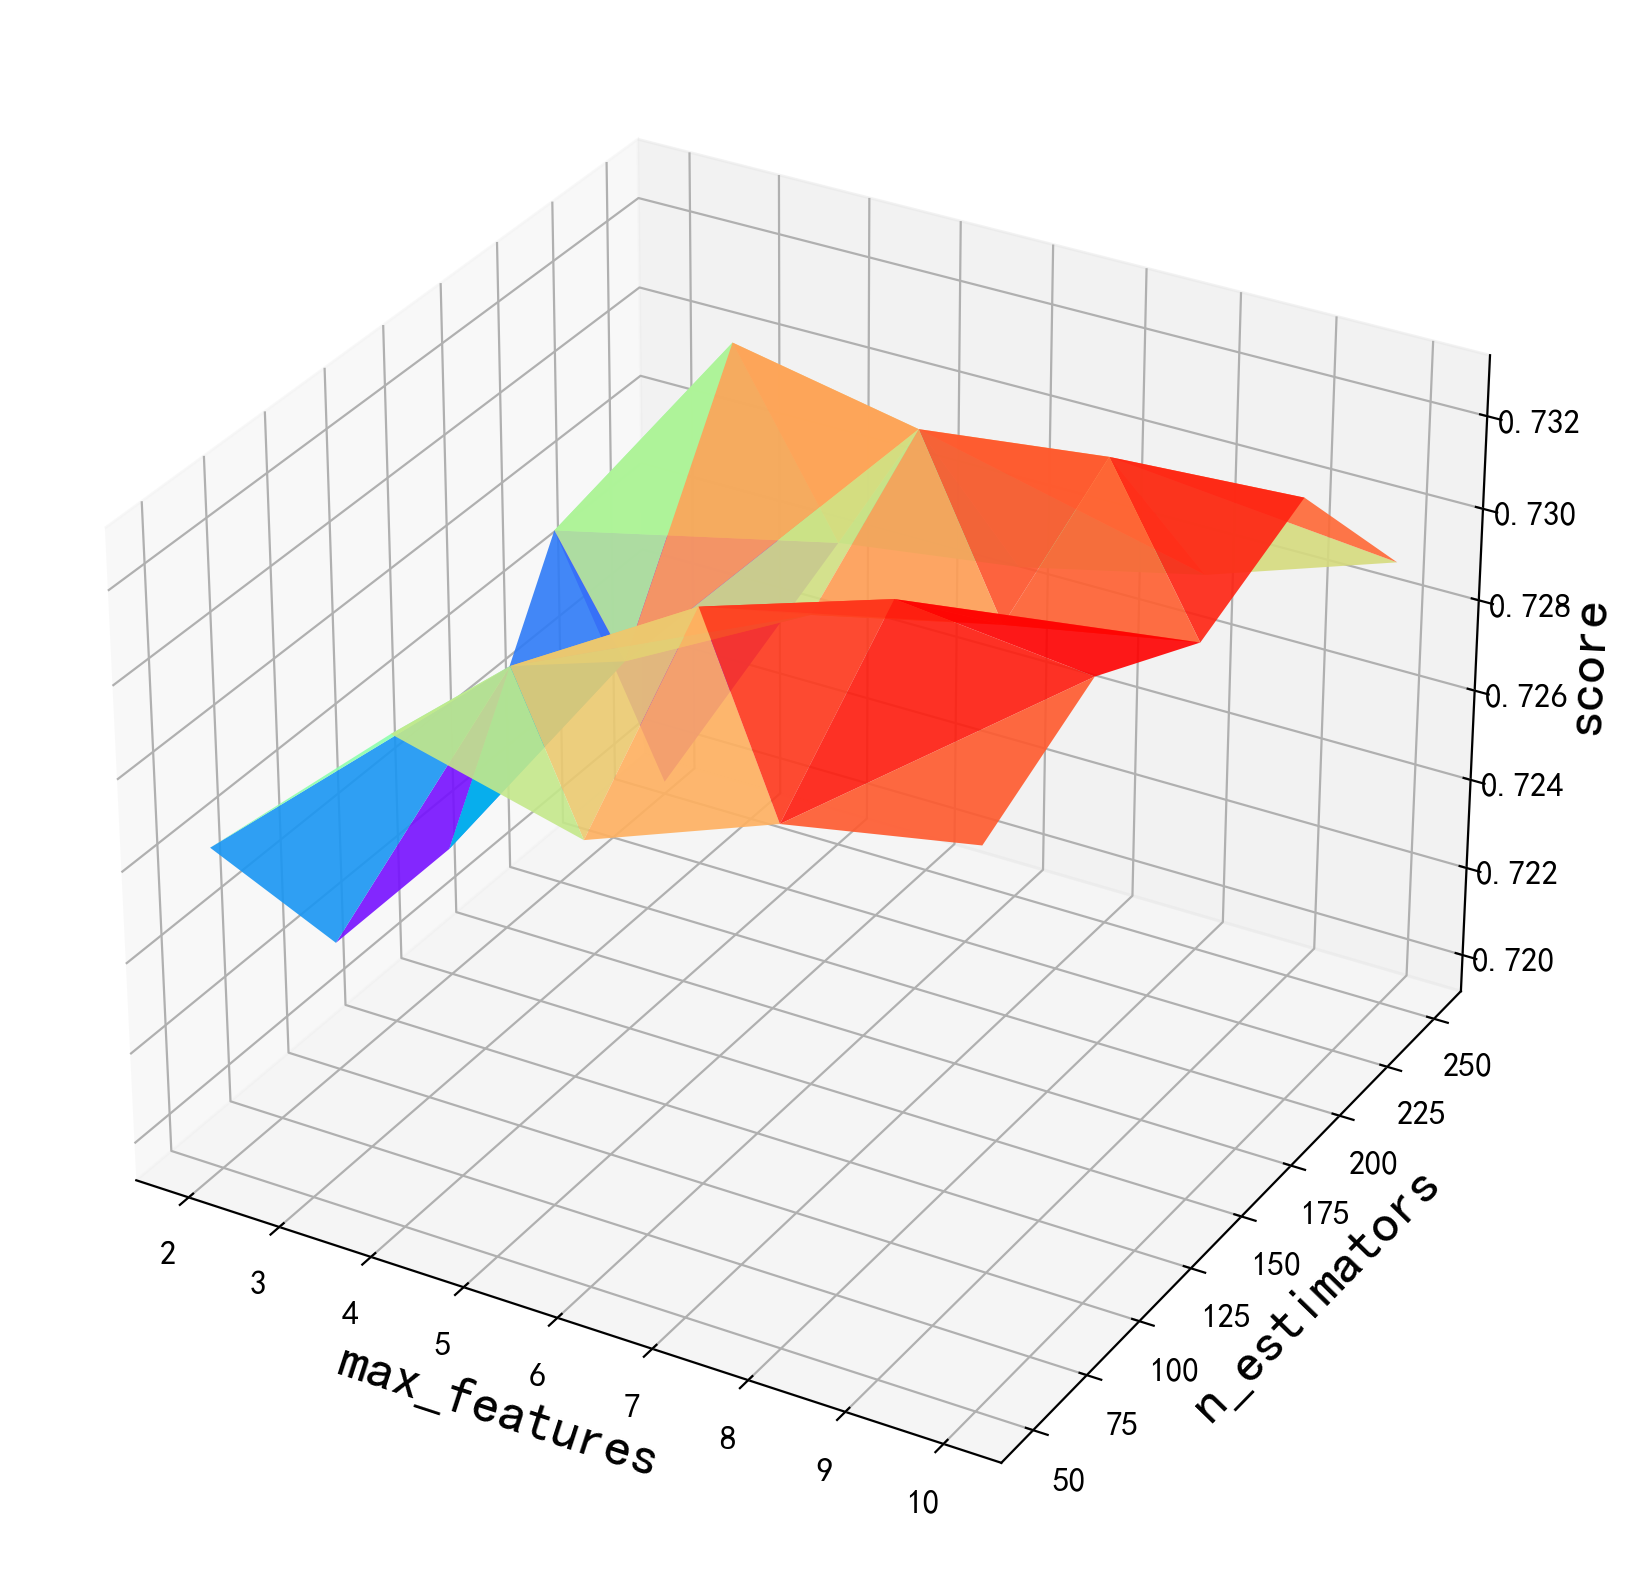

In [20]:
from tkinter.ttk import Style
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  #三维图绘制包
import pandas as pd  
import seaborn as sns     


max_features = np.array([2,4,6,8,10])
n_estimators = np.array([50,100,150,200,250])
xx1, yy1 = np.meshgrid(max_features ,n_estimators)

newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = yy1.reshape(newshape)
x_input = xx1.reshape(newshape)
z_input = np.array(score_lst).reshape(newshape)

fig = plt.figure(figsize=(10,8),dpi=200)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x_input,y_input,z_input,cmap='rainbow',color='white',alpha=0.9)  


ax.set_ylabel('n_estimators',fontsize  = 20) 
ax.set_xlabel('max_features ',fontsize  = 20) 
ax.set_zlabel('score',fontsize  = 20) 
fig.tight_layout()
plt.show()

# GBRT

In [113]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint
start =time.process_time() #计算时间
training_scores=[]
#划分数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=49)
#定义参数
param_distribs = {
'max_depth': randint(low=2, high=20),
'n_estimators': randint(low=20, high=200),
}
#建立模型
gbrt = GradientBoostingRegressor(random_state=42,learning_rate=0.1)
rnd_search = RandomizedSearchCV(gbrt, param_distributions=param_distribs,n_iter=100, cv=5, scoring='r2', random_state=42)
rnd_search.fit(X_train, y_train)
end = time.process_time()
print('Running time: %s Seconds'%(end-start))
# 搜寻到的最佳模型
print(rnd_search.best_estimator_)
# 进行模型性能估计
y_pred1 = rnd_search.best_estimator_.predict(X_train)
y_pred2 = rnd_search.best_estimator_.predict(X_val)
print("训练 RMSE:",root_mean_squared_error(y_train, y_pred1))
print("训练 MAE:",mean_absolute_error(y_train, y_pred1))
print("得分:",np.sqrt(rnd_search.score(X_val,y_val)))
print("测试 RMSE:",root_mean_squared_error(y_val, y_pred2))
print("测试 MAE:",mean_absolute_error(y_val, y_pred2))
print('拟合度：',r2_score(y_val,y_pred2))


d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaco

Running time: 543.296875 Seconds
GradientBoostingRegressor(max_depth=5, n_estimators=170, random_state=42)
训练 RMSE: 0.2778530102516461
训练 MAE: 0.2090296809148466
得分: 0.8512549283824191
测试 RMSE: 0.7611042912646029
测试 MAE: 0.5553333617003194
拟合度： 0.7246349530953575


In [ ]:
'''
Running time: 543.296875 Seconds
GradientBoostingRegressor(max_depth=5, n_estimators=170, random_state=42)
训练 RMSE: 0.2778530102516461
训练 MAE: 0.2090296809148466
得分: 0.8512549283824191
测试 RMSE: 0.7611042912646029
测试 MAE: 0.5553333617003194
拟合度： 0.7246349530953575
'''

In [ ]:
#拟合图
aa_true=pd.DataFrame(y_val[:30]).values
aa_val=y_pred2[:30]
plt.figure(figsize=(10,5),dpi=300)
plt.plot(aa_true, "b.-",label='test_true')
plt.plot(aa_val, "r.-",label='test_pre')
plt.xlabel("30 个数据编号")
plt.ylabel("pIC50")
plt.legend(['val_true','val_pre'])
plt.title("GBRT模型 30 个验证数据真实值和预测值", fontsize=14)

## GBRT调参图

In [24]:
from sklearn.model_selection import cross_val_score

score_lst = []
best_score = 0

for max_depth in [16,20,24,28,32]:
    for n_estimators in  [160,200,240,280,320]:
        RF_clf= RandomForestRegressor(max_depth=max_depth,n_estimators=n_estimators,random_state=42)
        score = cross_val_score(RF_clf,X_train,y_train,cv=5,scoring='r2')
        score_lst.append(score.mean())
        if score.mean() > best_score:
            best_score = score.mean()
            best_parameters = {'max_depth':max_depth,"n_estimators":n_estimators}
            print(max_depth,n_estimators,score.mean())
        else:
            pass
            
print('Best socre:{:.2f}'.format(best_score))
print('Best parameters:{}'.format(best_parameters))
print(score_lst)

d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

16 160 0.7202398736244191


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

16 200 0.7218113937448639


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

16 240 0.7222386412233304


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

16 280 0.723089238844461


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

16 320 0.7234700146016664


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

20 280 0.7243962741092368


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

20 320 0.7245103378654137


d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Best socre:0.72
Best parameters:{'max_depth': 20, 'n_estimators': 320}
[0.7202398736244191, 0.7218113937448639, 0.7222386412233304, 0.723089238844461, 0.7234700146016664, 0.7214529812493033, 0.7228136242179783, 0.7234586779575679, 0.7243962741092368, 0.7245103378654137, 0.7214556745429797, 0.7228394155552633, 0.7230610546733924, 0.7239845999030066, 0.7243716366007703, 0.7211739122642843, 0.7227361168046403, 0.7229590443050584, 0.723780783245455, 0.7241197785702862, 0.7212478365446868, 0.7227581281163808, 0.7229385284470872, 0.7237708326687494, 0.7241433510148212]


In [ ]:
'''
20 200 0.7228136242179783
Best socre:0.72
Best parameters:{'max_depth': 20, 'n_estimators': 200}
'''

C:\Users\赵龙\AppData\Local\Temp\ipykernel_20196\383770452.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


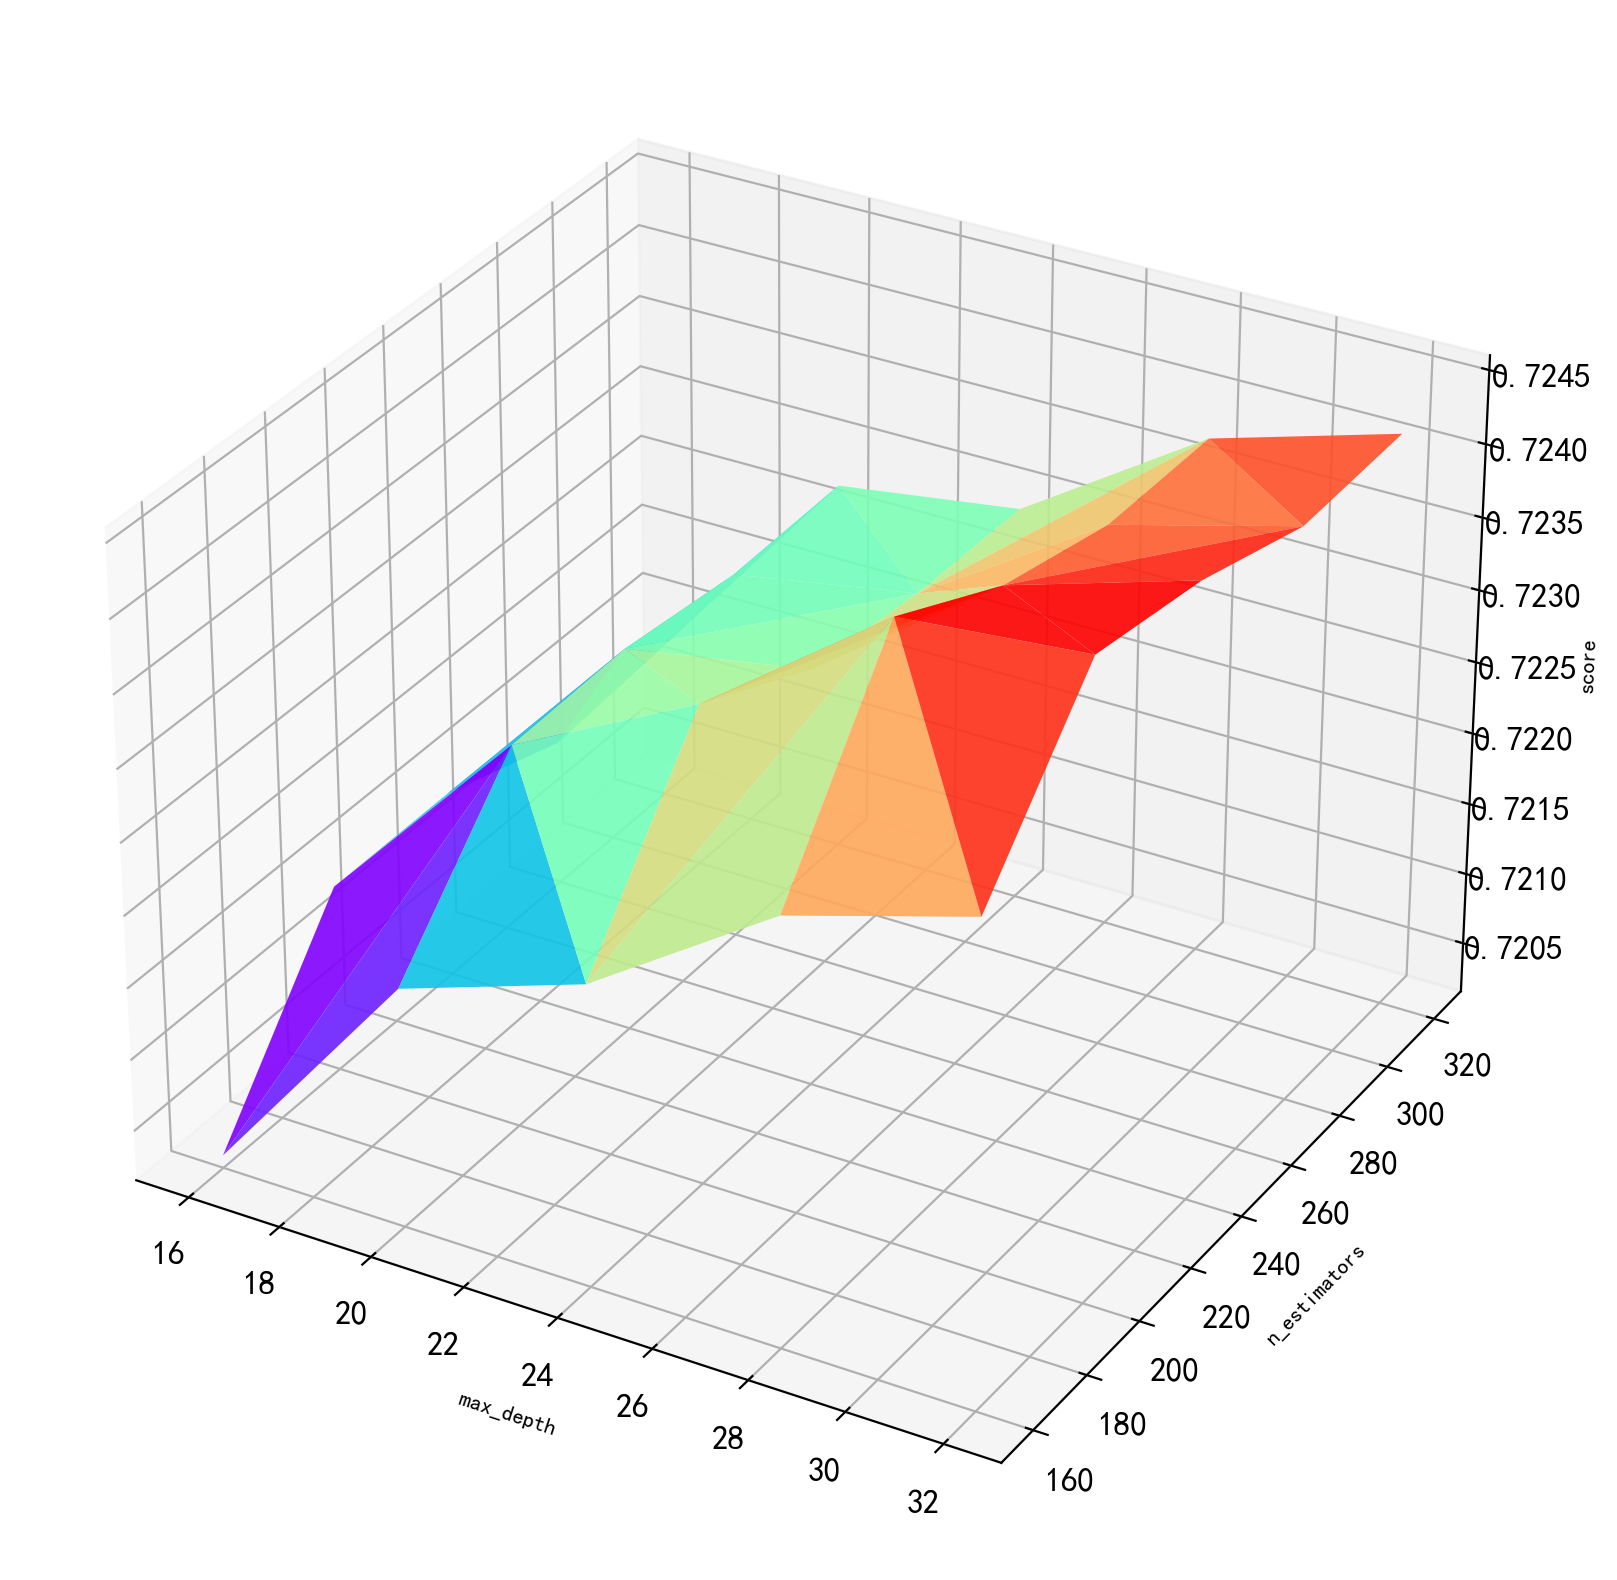

In [26]:
from tkinter.ttk import Style
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  #三维图绘制包
import pandas as pd  
import seaborn as sns     


max_depth = np.array([16,20,24,28,32])
n_estimators = np.array([160,200,240,280,320])
xx1, yy1 = np.meshgrid(max_depth ,n_estimators)

newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = yy1.reshape(newshape)
x_input = xx1.reshape(newshape)
z_input = np.array(score_lst).reshape(newshape)

fig = plt.figure(figsize=(10,8),dpi=200)
ax = fig.gca(projection='3d')
ax.plot_trisurf(x_input,y_input,z_input,cmap='rainbow',color='white',alpha=0.9)  


ax.set_ylabel('n_estimators',fontsize  = 8) 
ax.set_xlabel('max_depth ',fontsize  = 8) 
ax.set_zlabel('score',fontsize  = 8) 
fig.tight_layout()
plt.show()

# RF预测

In [1]:
#导入测试集
X_test= pd.read_excel('D:\\my_dateset\\Molecular_Descriptor_test.xlsx',index_col='SMILES')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#划分数据集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=49)
Rtree_clf = RandomForestRegressor(max_features=4, n_estimators=199, random_state=42)
Rtree_clf.fit(X_train, y_train)
# 进行模型性能估计
y_pred1 = Rtree_clf.predict(X_train)
y_pred2 = Rtree_clf.predict(X_val)
print("训练 RMSE:",root_mean_squared_error(y_train, y_pred1))
print("训练 MAE:",mean_absolute_error(y_train, y_pred1))
print("得分:",np.sqrt(Rtree_clf.score(X_val,y_val)))
print("测试 RMSE:",root_mean_squared_error(y_val, y_pred2))
print("测试 MAE:",mean_absolute_error(y_val, y_pred2))
print('拟合度：',r2_score(y_val,y_pred2))
#预测 50 组数据并保存
y_test_pre_pIC50= Rtree_clf.predict(X_test)
y_test_pre_pIC50=pd.DataFrame(y_test_pre_pIC50)
y_test_pre_pIC50.to_excel('D:\my_dateset\pre_pIC50.xlsx', index=False)

NameError: name 'pd' is not defined

In [2]:
y_test_pre_pIC50=pd.DataFrame(y_test_pre_pIC50)

NameError: name 'pd' is not defined